In [89]:
import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
data = pd.DataFrame(data)
#print(data.head())

In [90]:
import pandas as pd

numero_columnas = len(data.columns)
print(f"El DataFrame tiene {numero_columnas} columnas.")
numero_filas = len(data)
print(f"El DataFrame tiene {numero_filas} filas.")

El DataFrame tiene 37 columnas.
El DataFrame tiene 4424 filas.


Veo si hay algun valor nulo en total:

In [91]:
import pandas as pd

hay_nulos = data.isnull().values.any()
print(hay_nulos)

False


Codifico la columna Blanco/Situación:

In [92]:
data['Blanco/situacion'] = data['Blanco/situacion'].replace({
    'Dropout': 1,
    'Enrolled': 2,
    'Graduate': 3
})

C:\Users\User\AppData\Local\Temp\ipykernel_15308\2851515680.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Blanco/situacion'] = data['Blanco/situacion'].replace({


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Estado Civil                                      4424 non-null   int64  
 1   Modo de aplicación                                4424 non-null   int64  
 2   Orden de aplicación                               4424 non-null   int64  
 3   Curso                                             4424 non-null   int64  
 4   Asistencia diurna/nocturna                        4424 non-null   int64  
 5   Titulación previa                                 4424 non-null   int64  
 6   Titulación previa (grado)                         4424 non-null   float64
 7   Nacionalidad                                      4424 non-null   int64  
 8   Titulación de la madre                            4424 non-null   int64  
 9   Titulacion del padr

Busco los object que columnas son para tratarlos:

In [94]:
import pandas as pd

object_columns = data.select_dtypes(include=['object']).columns
print("Columnas de tipo 'object':")
print(object_columns)


Columnas de tipo 'object':
Index(['Unidades curriculares 1º sem (grado)', 'Unidades curriculares 2º sem (grado)'], dtype='object')


Trato las columnas 'object': Cambio las ',' por '.' en los números decimales como: 2678,90

In [95]:
# Reemplazar comas por puntos en la columna 'Unidades curriculares 1º sem (grado)' y en la columna 'Unidades curriculares 2º sem (grado)'
data['Unidades curriculares 1º sem (grado)'] = data['Unidades curriculares 1º sem (grado)'].str.replace(',', '.')
data['Unidades curriculares 2º sem (grado)'] = data['Unidades curriculares 2º sem (grado)'].str.replace(',', '.')
print(data['Unidades curriculares 1º sem (grado)'])
print(data['Unidades curriculares 2º sem (grado)'])

0                        0.0
1                       14.0
2                        0.0
3       13428571428571400.00
4       12333333333333300.00
                ...         
4419                    13.6
4420                    12.0
4421                  149125
4422                    13.8
4423    11666666666666600.00
Name: Unidades curriculares 1º sem (grado), Length: 4424, dtype: object
0               0.0
1       1.36667E+16
2               0.0
3              12.4
4              13.0
           ...     
4419    1.26667E+16
4420           11.0
4421           13.5
4422           12.0
4423           13.0
Name: Unidades curriculares 2º sem (grado), Length: 4424, dtype: object


In [96]:
'''import pandas as pd

# Crear listas para almacenar los tipos de datos de cada columna
tipos_de_datos_1 = []
tipos_de_datos_2 = []

# Iterar sobre cada valor en la columna 'Unidades curriculares 1º sem (grado)'
for value in data['Unidades curriculares 1º sem (grado)']:
    tipos_de_datos_1.append(type(value).__name__)

# Iterar sobre cada valor en la columna 'Unidades curriculares 2º sem (grado)'
for value in data['Unidades curriculares 2º sem (grado)']:
    tipos_de_datos_2.append(type(value).__name__)

# Crear un nuevo DataFrame con las dos columnas requeridas
nuevo_df = pd.DataFrame({
    'Unidades curriculares 1º sem (grado)': data['Unidades curriculares 1º sem (grado)'],
    'Tipo de dato 1º sem': tipos_de_datos_1,
    'Unidades curriculares 2º sem (grado)': data['Unidades curriculares 2º sem (grado)'],
    'Tipo de dato 2º sem': tipos_de_datos_2
})

# Guardar el resultado en un archivo CSV
#nuevo_df.to_csv('data_con_tipos_de_datos.csv', index=False)

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(nuevo_df.head())

'''

"import pandas as pd\n\n# Crear listas para almacenar los tipos de datos de cada columna\ntipos_de_datos_1 = []\ntipos_de_datos_2 = []\n\n# Iterar sobre cada valor en la columna 'Unidades curriculares 1º sem (grado)'\nfor value in data['Unidades curriculares 1º sem (grado)']:\n    tipos_de_datos_1.append(type(value).__name__)\n\n# Iterar sobre cada valor en la columna 'Unidades curriculares 2º sem (grado)'\nfor value in data['Unidades curriculares 2º sem (grado)']:\n    tipos_de_datos_2.append(type(value).__name__)\n\n# Crear un nuevo DataFrame con las dos columnas requeridas\nnuevo_df = pd.DataFrame({\n    'Unidades curriculares 1º sem (grado)': data['Unidades curriculares 1º sem (grado)'],\n    'Tipo de dato 1º sem': tipos_de_datos_1,\n    'Unidades curriculares 2º sem (grado)': data['Unidades curriculares 2º sem (grado)'],\n    'Tipo de dato 2º sem': tipos_de_datos_2\n})\n\n# Guardar el resultado en un archivo CSV\n#nuevo_df.to_csv('data_con_tipos_de_datos.csv', index=False)\n\n# Mo

Paso de object a float64 las columnas: Unidades curriculares 2º sem (grado) y Unidades curriculares 2º sem (grado)

In [97]:
import pandas as pd

# Reemplazar las comas por puntos en los datos de las columnas
data['Unidades curriculares 1º sem (grado)'] = data['Unidades curriculares 1º sem (grado)'].str.replace(',', '.')
data['Unidades curriculares 2º sem (grado)'] = data['Unidades curriculares 2º sem (grado)'].str.replace(',', '.')

# Convertir los datos de las columnas a float
data['Unidades curriculares 1º sem (grado)'] = data['Unidades curriculares 1º sem (grado)'].astype(float)
data['Unidades curriculares 2º sem (grado)'] = data['Unidades curriculares 2º sem (grado)'].astype(float)

# Verificar la conversión
print(data['Unidades curriculares 1º sem (grado)'].head())
print(data['Unidades curriculares 1º sem (grado)'].dtype)
print(data['Unidades curriculares 2º sem (grado)'].head())
print(data['Unidades curriculares 2º sem (grado)'].dtype)

0    0.000000e+00
1    1.400000e+01
2    0.000000e+00
3    1.342857e+16
4    1.233333e+16
Name: Unidades curriculares 1º sem (grado), dtype: float64
float64
0    0.000000e+00
1    1.366670e+16
2    0.000000e+00
3    1.240000e+01
4    1.300000e+01
Name: Unidades curriculares 2º sem (grado), dtype: float64
float64


Para ver que el haber cambiado de object a float no ha dañado los datos, comparo con el excel original las sumas finales:

In [98]:
import pandas as pd

suma = data['Unidades curriculares 1º sem (grado)'].sum()
print(f"La suma de la columna 'Unidades curriculares 1º sem (grado)' es: {suma}")

suma = data['Unidades curriculares 2º sem (grado)'].sum()
print(f"La suma de la columna 'Unidades curriculares 2º sem (grado)' es: {suma}")

La suma de la columna 'Unidades curriculares 1º sem (grado)' es: 1.972259411708851e+19
La suma de la columna 'Unidades curriculares 2º sem (grado)' es: 1.738027764011405e+19


In [99]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Estado Civil                                      4424 non-null   int64  
 1   Modo de aplicación                                4424 non-null   int64  
 2   Orden de aplicación                               4424 non-null   int64  
 3   Curso                                             4424 non-null   int64  
 4   Asistencia diurna/nocturna                        4424 non-null   int64  
 5   Titulación previa                                 4424 non-null   int64  
 6   Titulación previa (grado)                         4424 non-null   float64
 7   Nacionalidad                                      4424 non-null   int64  
 8   Titulación de la madre                            4424 non-null   int64  
 9   Titulacion del padr

In [100]:
print(data.describe())

       Estado Civil  Modo de aplicación  Orden de aplicación        Curso  \
count   4424.000000         4424.000000          4424.000000  4424.000000   
mean       1.178571           18.669078             1.727848  8856.642631   
std        0.605747           17.484682             1.313793  2063.566416   
min        1.000000            1.000000             0.000000    33.000000   
25%        1.000000            1.000000             1.000000  9085.000000   
50%        1.000000           17.000000             1.000000  9238.000000   
75%        1.000000           39.000000             2.000000  9556.000000   
max        6.000000           57.000000             9.000000  9991.000000   

       Asistencia diurna/nocturna  Titulación previa  \
count                 4424.000000        4424.000000   
mean                     0.890823           4.577758   
std                      0.311897          10.216592   
min                      0.000000           1.000000   
25%                      1

Miro si hay columnas iguales ya que por título se parecen:

In [101]:
import pandas as pd

columns = data.columns
# Crear un DataFrame para almacenar los resultados de la comparación
comparison_matrix = pd.DataFrame(index=columns, columns=columns)

# Comparar cada columna con cada otra columna
for col1 in columns:
    for col2 in columns:
        # Comparar solo si las columnas no son la misma
        if col1 != col2:
            comparison_matrix.at[col1, col2] = data[col1].equals(data[col2])
        else:
            comparison_matrix.at[col1, col2] = False

# Imprimir la matriz de comparación
print(comparison_matrix)

# Encontrar columnas que son iguales
equal_columns = comparison_matrix[comparison_matrix]

# Filtrar los resultados para que solo se muestren las columnas comparadas como iguales
# Es importante seleccionar solo pares únicos de columnas y no las diagonales
equal_columns = equal_columns.stack()
equal_columns = equal_columns[equal_columns == True]

# Mostrar columnas que son iguales
if not equal_columns.empty:
    print("Las siguientes columnas son iguales:")
    for (col1, col2) in equal_columns.index:
        print(f"Columna '{col1}' es igual a columna '{col2}'")
else:
    print("No hay columnas iguales.")


                                                 Estado Civil  \
Estado Civil                                            False   
Modo de aplicación                                      False   
Orden de aplicación                                     False   
Curso                                                   False   
Asistencia diurna/nocturna                              False   
Titulación previa                                       False   
Titulación previa (grado)                               False   
Nacionalidad                                            False   
Titulación de la madre                                  False   
Titulacion del padre                                    False   
Ocupacion de la madre                                   False   
Ocupacion del padre                                     False   
Nota de ingreso                                         False   
Desplazado                                              False   
Necesidades educativas es

In [102]:
print(data.columns)

Index(['Estado Civil', 'Modo de aplicación', 'Orden de aplicación', 'Curso',
       'Asistencia diurna/nocturna', 'Titulación previa',
       'Titulación previa (grado)', 'Nacionalidad', 'Titulación de la madre',
       'Titulacion del padre', 'Ocupacion de la madre', 'Ocupacion del padre',
       'Nota de ingreso', 'Desplazado', 'Necesidades educativas especiales',
       'Deudor', 'Tasas de matricula al día', 'Genero', 'Becario',
       'Edad en el momento de la inscripción', 'Internacional',
       'Unidades curriculares 1er semestre(acreditado)',
       'Unidades curriculares 1º semestre (matriculado)',
       'Unidades curriculares 1º semestre (evaluaciones)',
       'Unidades curriculares 1º sem (aprobado)',
       'Unidades curriculares 1º sem (grado)',
       'Unidades curriculares 1º sem (sin evaluaciones)',
       'Unidades curriculares 2º sem (acreditado)',
       'Unidades curriculares 2º sem (matriculados)',
       'Unidades curriculares 2º sem (evaluaciones)',
       'Uni

Mapa de correlaciones:

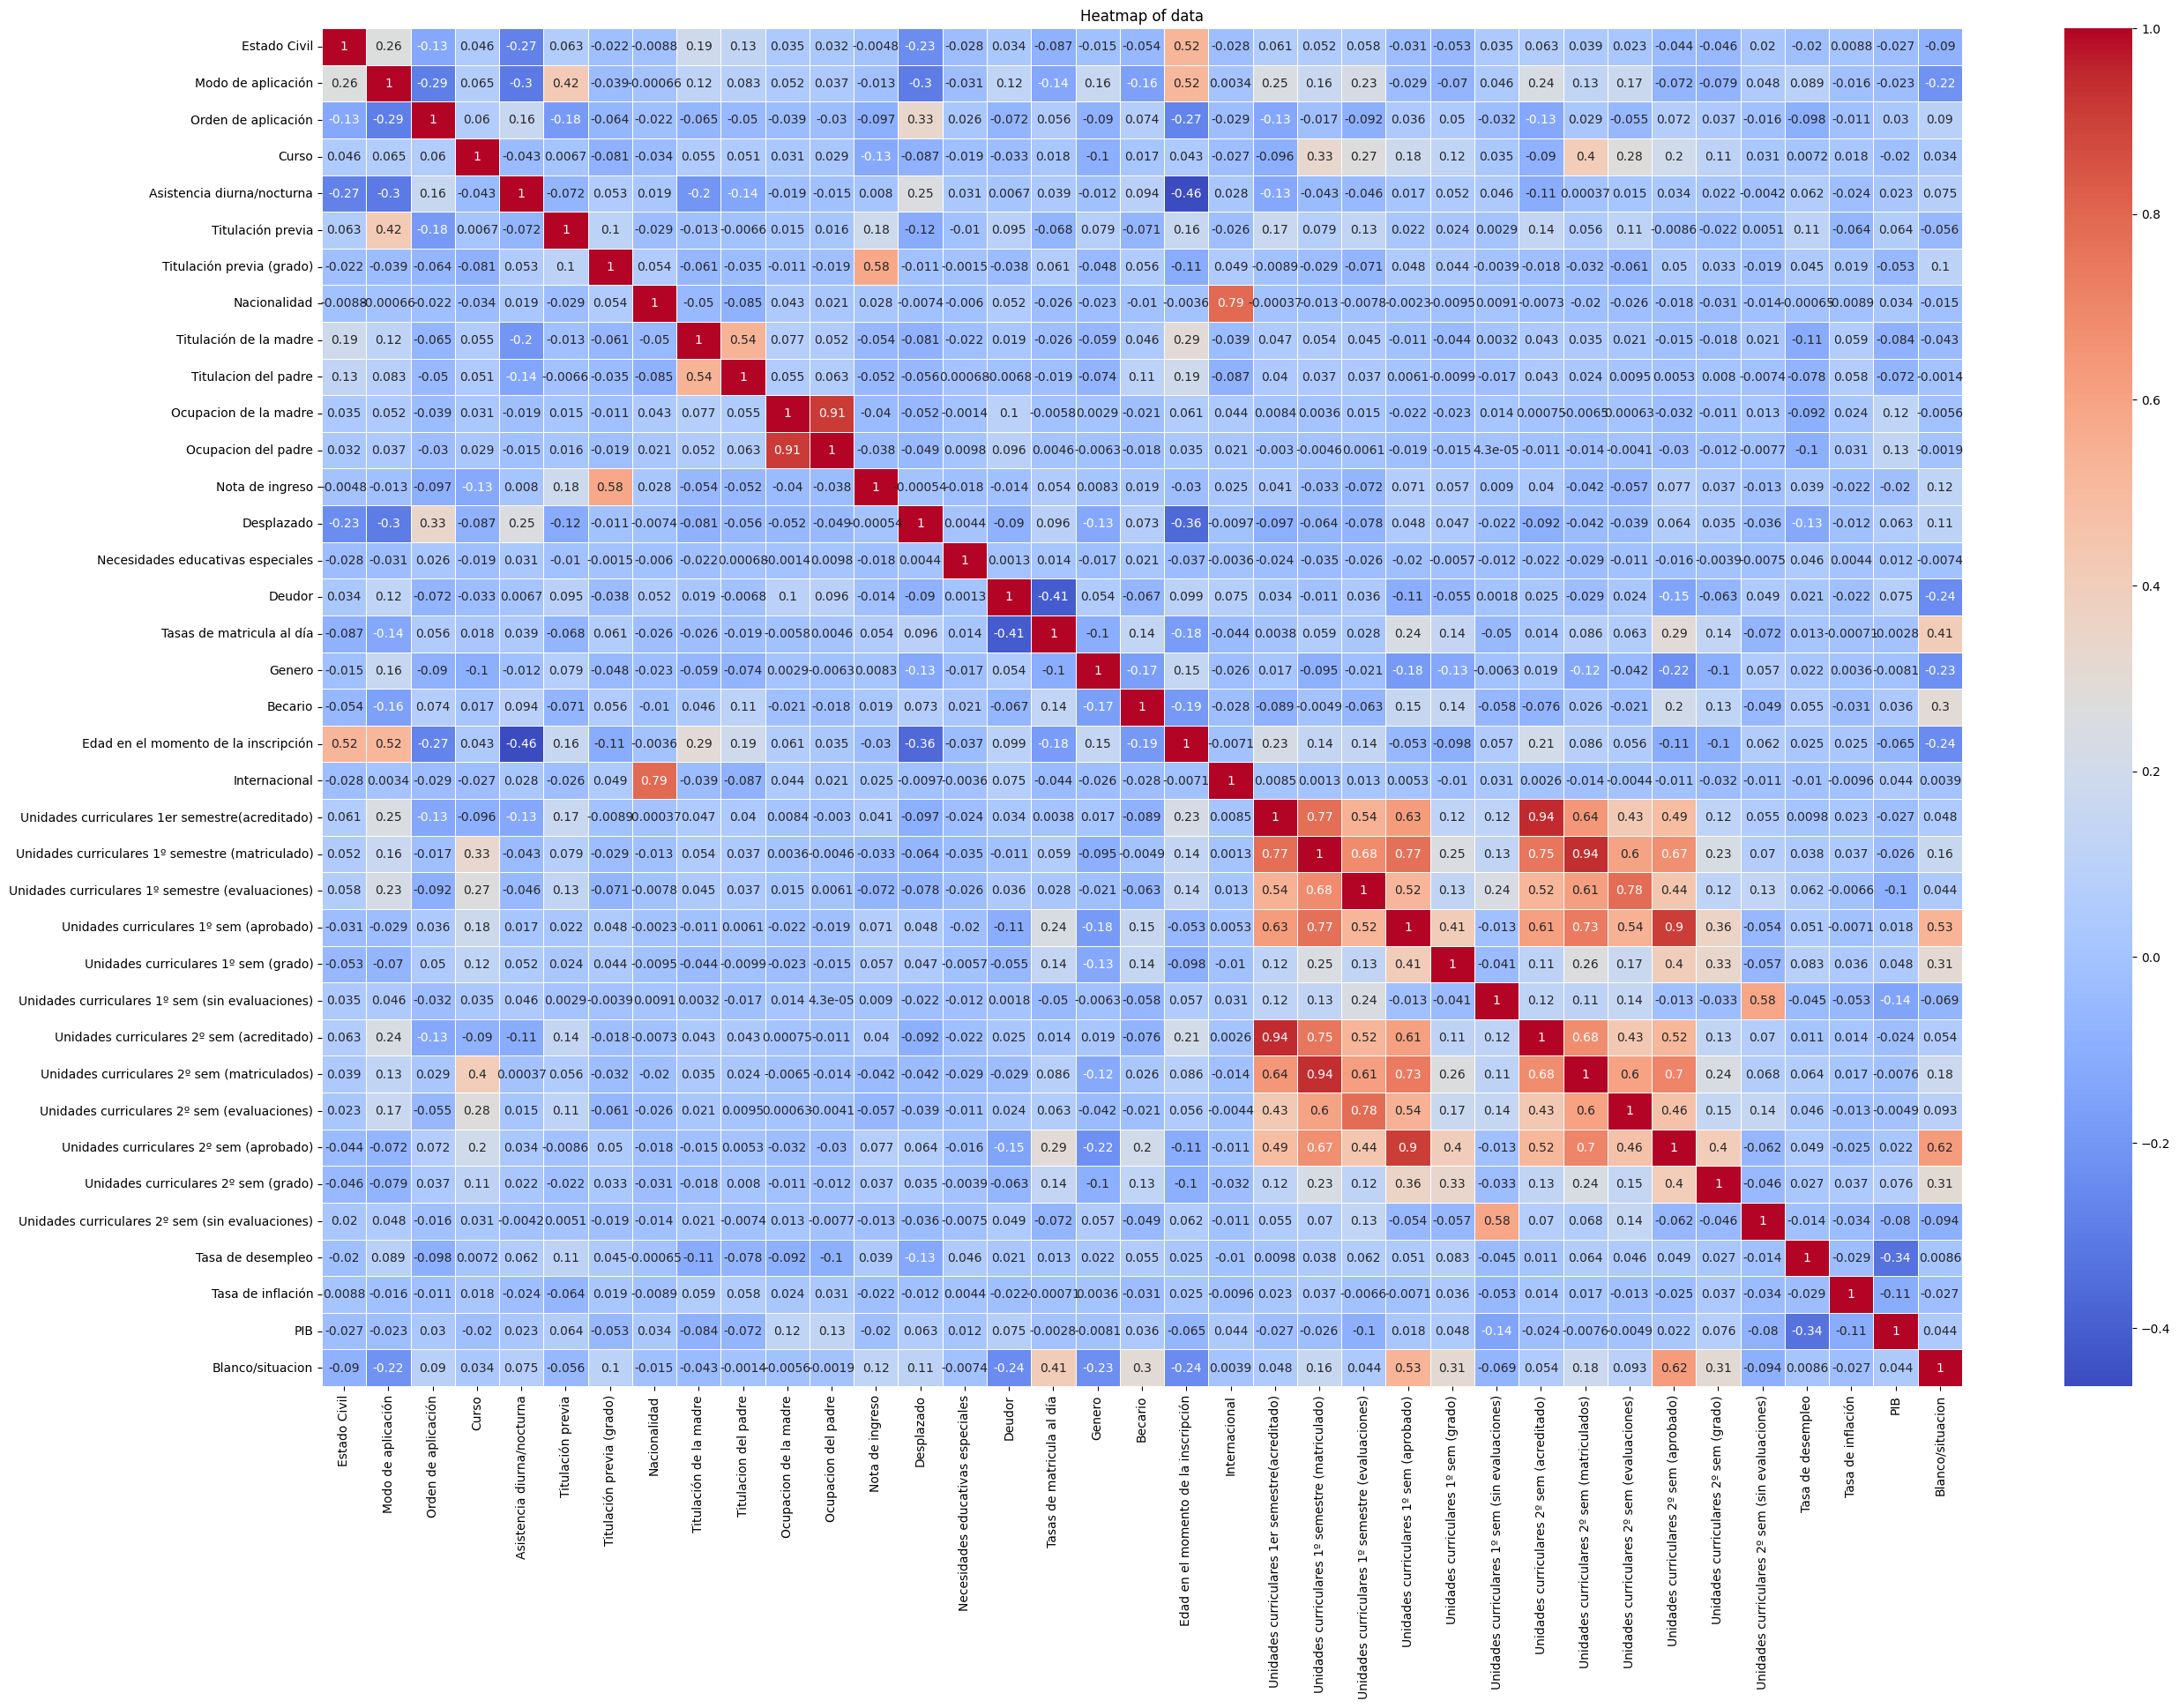

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_df = data.select_dtypes(include=[float, int])

# Crear el heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of data')
plt.show()

In [106]:
import pandas as pd

columns_to_select = [
    'Unidades curriculares 1er semestre(acreditado)',
    'Unidades curriculares 1º semestre (matriculado)',
    'Unidades curriculares 1º semestre (evaluaciones)',
    'Unidades curriculares 1º sem (aprobado)',
    'Unidades curriculares 1º sem (grado)',
    'Unidades curriculares 1º sem (sin evaluaciones)',
    'Unidades curriculares 2º sem (acreditado)',
    'Unidades curriculares 2º sem (matriculados)',
    'Unidades curriculares 2º sem (evaluaciones)',
    'Unidades curriculares 2º sem (aprobado)',
    'Unidades curriculares 2º sem (grado)',
    'Unidades curriculares 2º sem (sin evaluaciones)'
]
df = data[columns_to_select]

Para ver mejor las variables que más se correlan entre sí:

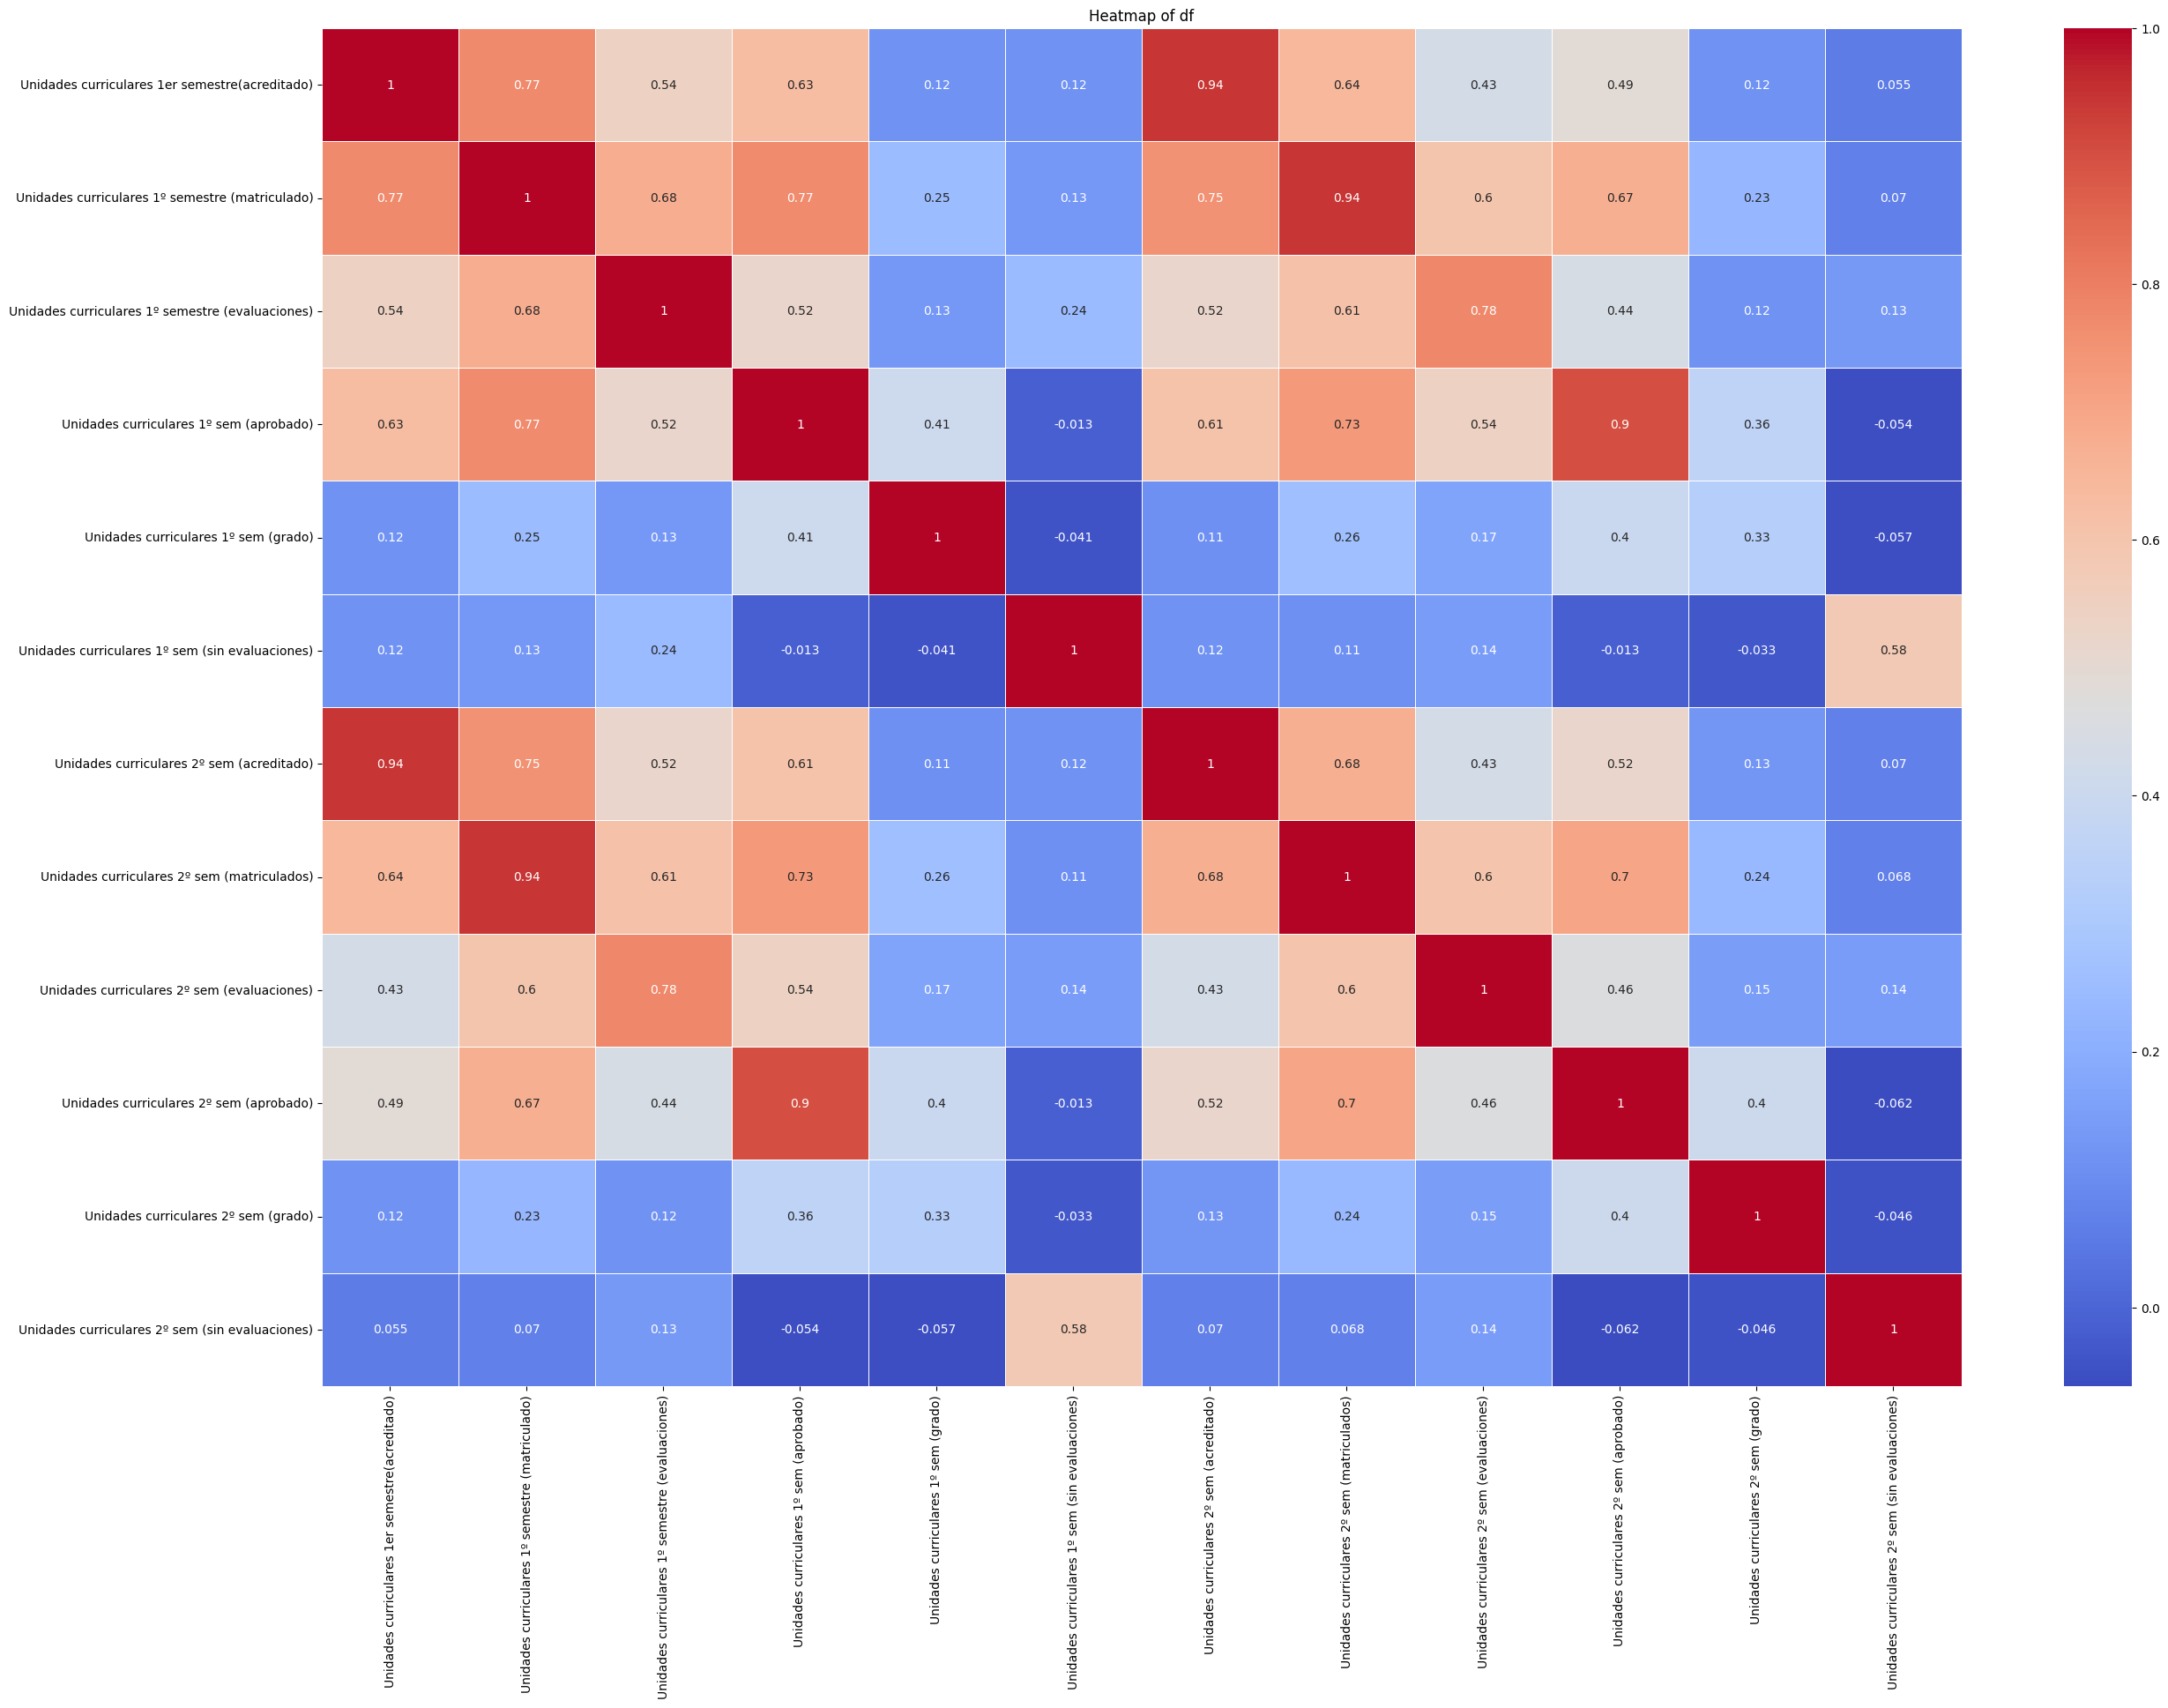

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Crear el heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of df')
plt.show()

Las correlaciones más altas son las siguientes:
1er semestre (acreditado)' con:
                                1º semestre (matriculado)' (0.77)
                                2º semestre (acreditado)' (0.94)
1º semestre (matriculado)' con:
                                1º semestre (acreditado)' (0.77)
                                1º semestre (aprobado)' (0.77)
                                2º semestre (matriculados)' (0.94)
2º semestre (acreditado)' con:
                                1er semestre (acreditado)' (0.94)
                                2º semestre (matriculados)' (0.75)

Por lo que me encuentro, decido 